# 模型训练

In [1]:
import pandas as pd
from function import process_df, metrics_to_dataframe, plot_actual_vs_predicted

data = pd.read_csv('data/nofill.csv')
data = data.drop('PW', axis=1)
data

,CR,Lms,Morphology,SSA,Molarity,Cation,Anion,CD,Cs
0,1.39,2.56,1,64.8,2.0,1,1,1.0,431.82
1,1.39,2.56,1,64.8,2.0,1,1,2.0,398.88
2,1.39,2.56,1,64.8,2.0,1,1,3.0,312.18
3,1.39,2.56,1,64.8,2.0,1,1,5.0,272.00
4,1.39,2.56,1,64.8,2.0,1,1,7.0,230.70
...,...,...,...,...,...,...,...,...,...
182,1.54,2.41,2,21.1,1.0,3,3,1.0,129.20
183,1.54,2.41,2,21.1,1.0,3,3,1.5,115.10
184,1.54,2.41,2,21.1,1.0,3,3,3.0,102.30
185,1.54,2.41,2,21.1,1.0,3,3,5.0,92.00


In [2]:
# 处理DataFrame
X_train, X_test, y_train, y_test = process_df(data)

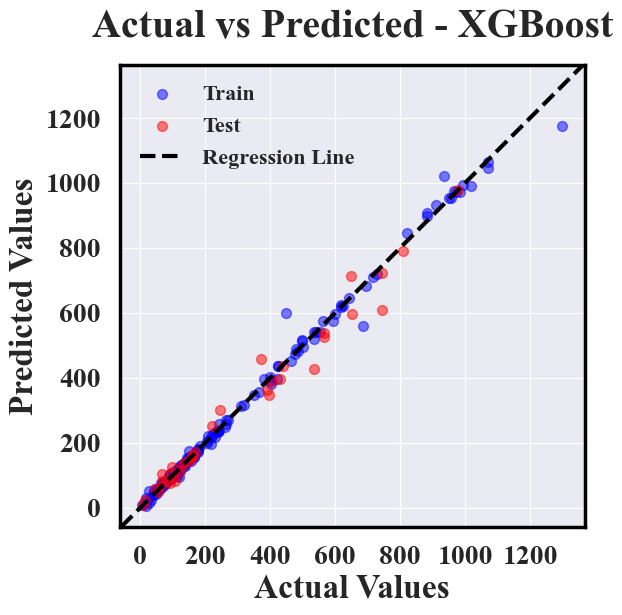

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.994,10.131,5.85,22.533,0.976,25.68,12.63,39.983


In [3]:
import xgboost

# 训练模型
xgb = xgboost.XGBRegressor(
    n_estimators=100, 
    learning_rate=0.28, 
    max_depth=10, 
    min_child_weight=3.55,
    subsample=0.7,
    colsample_bylevel=0.9,
    colsample_bytree=1,
    colsample_bynode=0.6,
    gamma=0.3,
    reg_alpha=0.55,
    reg_lambda=0.5,
    random_state=42
)

xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# 计算模型评估指标
metrics_xgb = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
metrics_xgb = metrics_xgb.round(3)

# 绘制实际值与预测值的图
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Actual vs Predicted - XGBoost', 'output/figures/xgboost.png')
metrics_xgb

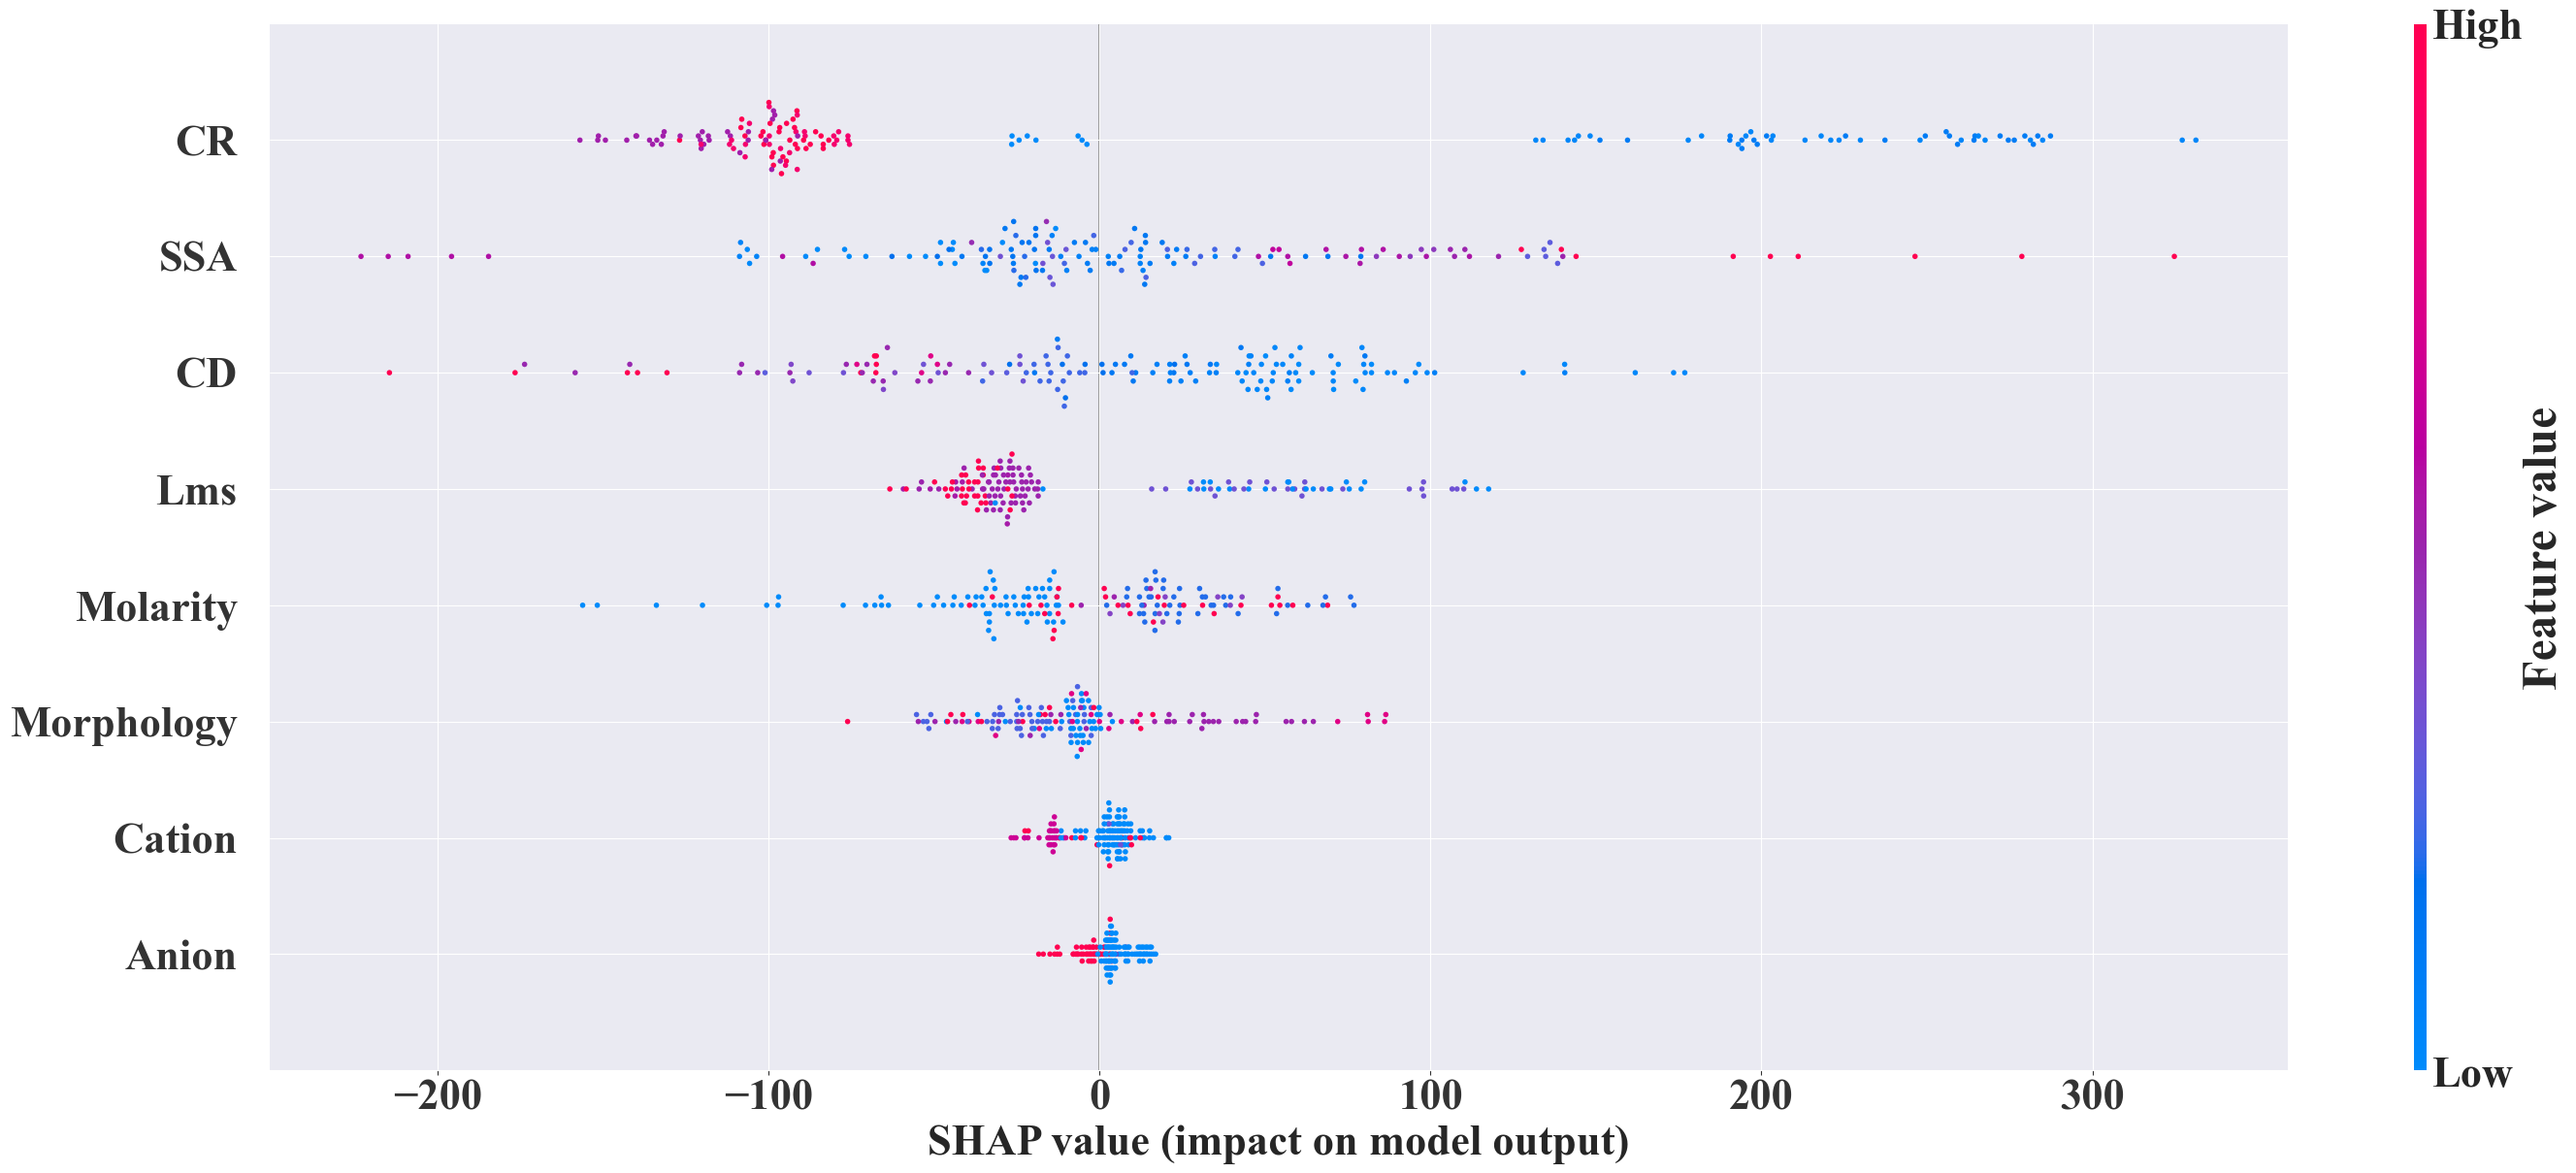

In [4]:
import shap
import matplotlib.pyplot as plt
explainer = shap.Explainer(xgb)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size=(28, 12), 
                  # max_display=9, 
                  show=False)
# 获取当前图形对象
fig = plt.gcf()

# 放大字体大小并更改字体为Times New Roman且加粗
for ax in fig.axes:
    ax.title.set_fontsize(48)  # 放大标题字体
    ax.title.set_fontweight('bold')  # 加粗标题字体
    ax.title.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.xaxis.label.set_size(32)  # 放大 x 轴标签字体
    ax.xaxis.label.set_fontweight('bold')  # 加粗 x 轴标签字体
    ax.xaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.yaxis.label.set_size(36)  # 放大 y 轴标签字体
    ax.yaxis.label.set_fontweight('bold')  # 加粗 y 轴标签字体
    ax.yaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(32)  # 放大刻度标签字体
        label.set_fontweight('bold')  # 加粗刻度标签字体
        label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

plt.savefig('output/figures/shap_trainset_summary_bar.png', bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=300)

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_train, plot_size=(28, 12), 
                  # max_display=10, 
                  show=False)
# 获取当前图形对象
fig = plt.gcf()

# 放大字体大小
for ax in fig.axes:
    ax.title.set_fontsize(48)  # 放大标题字体
    ax.title.set_fontweight('bold')  # 加粗标题字体
    ax.title.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.xaxis.label.set_size(32)  # 放大 x 轴标签字体
    ax.xaxis.label.set_fontweight('bold')  # 加粗 x 轴标签字体
    ax.xaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.yaxis.label.set_size(36)  # 放大 y 轴标签字体
    ax.yaxis.label.set_fontweight('bold')  # 加粗 y 轴标签字体
    ax.yaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(32)  # 放大刻度标签字体
        label.set_fontweight('bold')  # 加粗刻度标签字体
        label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
plt.savefig('output/figures/shap_trainset_summary.png', bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=300)